# Gradient Descent for a simple linear regression model

The notebook aims to study and implement gradient descet method to fit the coefficients of a simple linear regression model. A synthetic dataset will be used to construct and explain the concepts.


## Acknowledgments

- Used dataset: synthetic



## Importing libraries

In [7]:
# Import the packages that we will be using
import numpy as np                  # For array
import matplotlib.pyplot as plt     # For showing plots
#import pandas as pd                 # For data handling
#import seaborn as sns               # For advanced plotting


## Create data

In [8]:
# Data for the independent variable: height
x       = np.arange(0,10,0.5)

# Generate observations for the dependent variable according to: y = f(x)+noise
b0real  = 70
b1real  = 30
y       = b0real + b1real * x + np.random.normal(0, 20, len(x))

# Reshape
x       = x.reshape(-1, 1)
y       = y.reshape(-1, 1)


## Undertanding the dataset

Get a general 'feel' of the dataset

In [9]:
# Calculate number of observations
No = x.shape[0]

print("Number of observations = {0:0d}".format(No))


Number of observations = 20


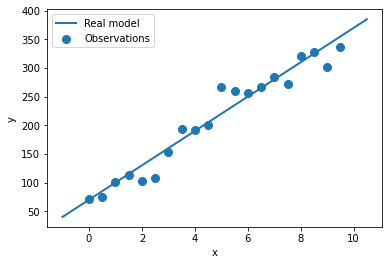

In [10]:
# Calculate data for the linear model
xl    = np.linspace(np.min(x)-1, np.max(x)+1, 100)
yreal =  b0real + b1real*xl

# Scatter plot of the data
plt.scatter(x, y, s=64, label='Observations' )
plt.plot(xl, yreal,     label='Real model',  linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


The scatter plot shows a linear positive relationship between $x$ and $y$: note that we draw the real linear model which is a straight line with positive slope. Note how the observed data is around the real linear model.


## Description of the linear model

We have the data $(x_1,y_1),(x_2,y_2),...,(x_N,y_N)$ and we want to construct a linear model to explain and predict $y$ based on $x$, that is:

$$y = \beta_0 + \beta_1 \cdot x$$

This is general form of a simple linear model, where $y$ is the dependent variable, $x$ is the independet variable and 
$\beta_0$ (intercept) and $\beta_1$ (slope) are the unknown model parameters (or coefficients) that will be estimated from the data.

- $y$: response 
- $x$: predictor/variable/feature
- $\beta_1$: coefficient (slope)
- $\beta_0$: intercept


The question is then: Which straight line (i.e., $\beta_0$ and $\beta_1$) should we choose based on the data? We choose the straight line (i.e., $\beta_0$ and $\beta_1$) where total sum of error is minimum.

Our task is to obtain **coefficient estimates** ($\hat{\beta_0} $ and $\hat{\beta_1}$) such that the linear model fits the available data well, that is, so that $y_i \approx \hat{\beta_0} + \hat{\beta_1} x_i $ for $i=1,2,...,N$

Previouslt, we learnt that the model parameters can be computed from data using the **least squares** criterion which minimize the residual sum of squares **RSS**.

Here we will use a different appoach, the **Gradient Descent** method which is an optimization technique highly important for training neural network models.


## Fitting the linear regression model using sklearn

Fitting the linear reggresion model using sklearn

In [11]:
# Import sklearn linear_model
from sklearn import linear_model

# Create linear regression object
regmodel = linear_model.LinearRegression()

# Train the model
regmodel.fit(x, y)

# Get coefficients
b0pred = regmodel.intercept_[0]
b1pred = regmodel.coef_[0][0]

# Print estimated coefficients
print("Estimated coefficients using sklearn:")
print("beta0 = {0:0.2f}".format(b0pred))
print("beta1 = {0:0.2f}".format(b1pred))


Estimated coefficients using sklearn:
beta0 = 68.37
beta1 = 29.81


In [12]:
# Recall the real coefficients
print("Real coefficients values:")
print("beta0 = {0:0.2f}".format(b0real))
print("beta1 = {0:0.2f}".format(b1real))


Real coefficients values:
beta0 = 70.00
beta1 = 30.00


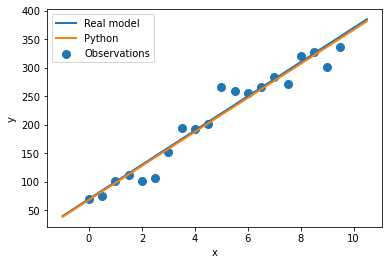

In [13]:
# Calculate data for the linear model using sklearn
ypred =  b0pred + b1pred*xl

# Scatter plot of the data
plt.scatter(x, y, s=64, label='Observations' )
plt.plot(xl, yreal,     label='Real model',  linewidth=2)
plt.plot(xl, ypred,     label='Python',      linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Gradient Descent


In many ML problems we have:
- Training dataset: $ \mathcal{D} = \{ (\mathbf{x}_i,y_i) \}_{i=1}^{N} $
- Hypothesis function: $ y = f(\mathbf{\beta}, \mathbf{x}) $
- Model parameters or weights: $\beta = [\beta_0, \beta_1, ..., \beta_p]^{T}$

and the goal is to learn the model parameters or weights $\mathbf{\beta}$ from the training dataset $\mathcal{D}$ so that we can predict $y$ based on new observatios $\mathbf{x}$

The **Gradient Descent** is an optimization algorithm used extensively in ML to learn the model parameters or or weights $\mathbf{\beta}$ from the training dataset $\mathcal{D}$. 

The method iteratively adapts (or updates) the parameters or weights of the model in order to minimize a cost function:

$$ \beta \Leftarrow \beta - \alpha \cdot \nabla_\beta J(\beta) $$

$$ \beta \Leftarrow \beta - \alpha \cdot \frac{\partial J(\beta)}{\partial \beta} $$

where:

- $\beta$ is the vector of model parameters or weights, $\beta = [\beta_0, \beta_1, ..., \beta_p]^{T}$
- $\alpha$ is the larning rate
- $\nabla_\beta (\cdot)$ is the partial derivative with respect to $\beta$
- $J(\beta)$ is the cost or loss function
- $\nabla_\beta J(\beta)$ is the partial derivative of the cost or loss function $J(\beta)$ with respect to $\beta$



The gradient descent **algorithm** is:

- Input:
    - Training data: $ \mathcal{D} = \{ (\mathbf{x}_i,y_i) \}_{i=1}^{N} $
    - Initial model parameters or weights $\beta$
    - Number of epochs (iterations) $N_{epochs}$
    - Learning rate $\alpha$


- For each epoch (iteration) repeat:
    - $ \beta := \beta – \alpha \cdot \nabla_\beta J(\beta) $


- Output:
    - Final model parameters or weights $\beta$
    - Loss function (which reduces across epochs)


Note that to be able to run the gradient descent we need:
- The hypothesis function $ f(\mathbf{\beta}, \mathbf{x}) $
- The cost or loss function $J(\beta)$
- The partial derivative of the cost or loss function $J(\beta)$ with respect to each parameter $\beta$, that is $\frac{\partial J(\beta)}{\partial \beta_j}$, for all $j=0,1,...,p$
- We can use use linear algebra to compute only one derivative (see activitiy)


## Gradient descent for the simple linear regression model

The linear model (hypothesis function) is:

$$y = f(\mathbf{\beta}, \mathbf{x}) = \beta_0 + \beta_1 \cdot x$$

Note that the vector of model parameters or weights is

$$ \beta = [\beta_0, \beta_1]^{T} $$

We have the training dataset $ \mathcal{D} = \{ (x_i,y_i) \}_{i=1}^{N} $ and our goal is to learn the model parameters of weights $ \beta $.

We choose as cost/loss function the residual sum of squares (**RSS**):

$$ J(\beta_0, \beta_1) = \sum_{i=1}^{N} \left( y_i - f(\mathbf{\beta}, \mathbf{x}) \right)^{2} $$

$$ J(\beta_0, \beta_1) = \sum_{i=1}^{N} \left( y_i - \beta_0 - \beta_1 x_{i} \right)^{2} $$

Note that we can use other cost or loss functions as the mean squared error (**MSE**).



Before implementing the gradient descent, we need the partial derivative of the cost or loss function $J(\beta)$ with respect to each parameter or weight, that is $\frac{\partial J(\beta)}{\partial \beta_j}$, for all $j=0,1,...,p$

For the case of the simple linear regression model we need to partial derivatives, $\frac{\partial J(\beta)}{\partial \beta_0}$ and $\frac{\partial J(\beta)}{\partial \beta_1}$

The partial derivative of $J(\beta_0, \beta_1)$ with respect to $\beta_0$ is

$$  \frac{ \partial J(\beta_0, \beta_1) }{\partial \beta_0} = -2 \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 x_{i}) \cdot 1 $$

While the partial derivative of $J(\beta_0, \beta_1)$ with respect to $\beta_1$ is

$$  \frac{ \partial J(\beta_0, \beta_1) }{\partial \beta_1} = -2 \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 x_{i}) \cdot x_{i} $$




Therefore, the update equation for the parameters $\beta_0$ is:
$$ \beta_0 := \beta_0 - \alpha \cdot \frac{ \partial J(\beta_0, \beta_1) }{\partial \beta_0 } $$

$$ \beta_0 := \beta_0 - \alpha \cdot \left(-2 \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 x_{i}) \cdot 1 \right) $$

While the update equation for the parameters $\beta_1$ is:
$$ \beta_1 := \beta_1 - \alpha \cdot \frac{ \partial J(\beta_0, \beta_1) }{\partial \beta_1} $$

$$ \beta_1 := \beta_1 - \alpha \cdot \left(-2 \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 x_{i}) \cdot x_{i} \right) $$

## Fitting the linear regression model using gradient descent

Fitting the linear reggresion model using gradient descent


<IPython.core.display.Javascript object>


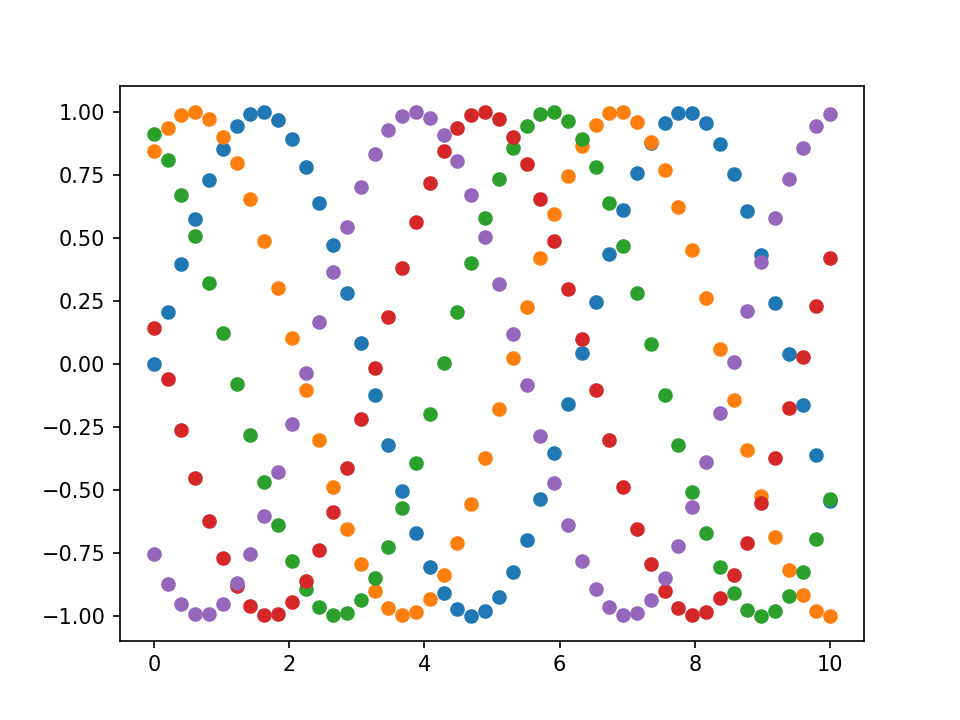

In [40]:
# Interactive Mode

%matplotlib notebook

# Import Library


import numpy as np
import time
import matplotlib.pyplot as plt

# Create subplots

figure, ax = plt.subplots(figsize=(4,5))

# Data Coordinates

x = np.linspace(0, 20, 80)
y = np.sin(x)

# GUI

plt.ion()

#  Plot

plot1, = ax.plot(x, y)

# Labels

plt.xlabel("X-Axis",fontsize=18)
plt.ylabel("Y-Axis",fontsize=18)

for value in range(150):
    update_y_value = np.sin(x-2.5*value)
    
    plot1.set_xdata(x)
    plot1.set_ydata(update_y_value)
    
    figure.canvas.draw()
    figure.canvas.flush_events()
    time.sleep(0.1)


# Display

plt.show()

<IPython.core.display.Javascript object>


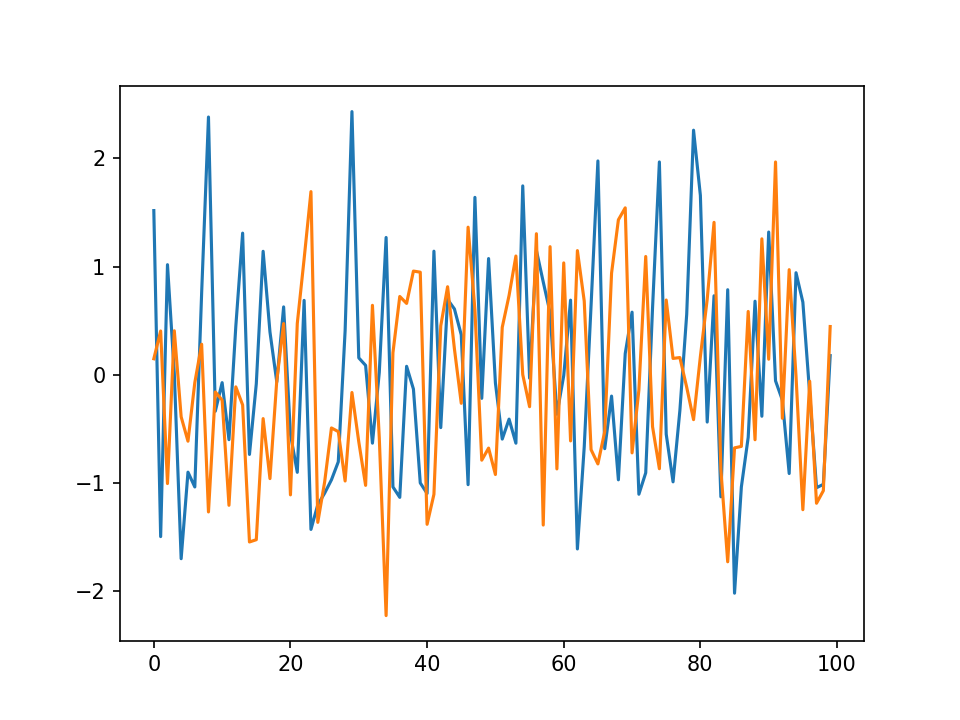

In [42]:
import time
import pylab as pl
from IPython import display
for i in range(2):
   pl.plot(pl.randn(100))
   display.clear_output(wait=True)
   display.display(pl.gcf())
   time.sleep(1.0)

In [14]:
# Gradient Descent for the simple linear model
def My_GradientDescent_SimpleLinearModel(x, y, alpha, Nepochs, doplot):
    # **********************************************************
    # Description of the inputs
    # x       --> Features (Nobservations x 1)
    # y       --> Response (Nobservations x 1)
    # alpha   --> Learning rate
    # Nepochs --> Number of epochs
    # doplot  --> A scalar (0:do not plot, 1: do plot)
    
    # **********************************************************
    #print("Executing gradient descent algoritm for the simple linear regression model ...")
    
    # **********************************************************
    # Initialize the model parameters or weights
    b0   = 0
    b1   = 0    
    
    # **********************************************************
    # Do plot
    if(doplot == 1):        
        # Plot data
        plt.scatter(x, y, s=128, Label='Data')
        # Plot the current model
        xl    = np.linspace(np.min(x)-1, np.max(x)+1, 100)
        yesti =  b0 + b1*xl
        plt.plot(xl, yesti,   ':g', linewidth=2, alpha=0.25 )
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
    
    # **********************************************************
    # Initialize a variable to store the loss function: RSS
    LossPerEpoch   = []
    
    # **********************************************************
    # For each epoch:
    for epoch in range(Nepochs):
        
        # Given the current model parameters: compute predicted outputs
        ypred       = b0 + b1 * x
        
        # Calculate and save the cost or loss function (RSS)
        Jb          = np.sum( (y-ypred)**2 )
        LossPerEpoch.append(Jb)
        
        # Calculate the derivatives        
        der_b0      = -(2/1) * np.sum( (y-ypred)*1 )
        der_b1      = -(2/1) * np.sum( (y-ypred)*x )
        
        # Update model parameters or weights
        b0          += - alpha * der_b0
        b1          += - alpha * der_b1
        
        # Do plot
        if(doplot == 1):
            # Plot the current model
            yesti =  b0 + b1*xl
            plt.plot(xl, yesti,   ':g', linewidth=2, alpha=0.25 )
        
        # Print results
        #print("Epoch: {0:0d} - Loss={1:0.4f}".format(epoch,Jb))
        
    return b0, b1, LossPerEpoch


In [28]:
# Set learning rate
alpha           = 0.0001

# Set number of epochs
Nepochs         = 1000

# Estimate model parameters using gradient descent
b0esti, b1esti, LossPerEpoch  = My_GradientDescent_SimpleLinearModel(x, y, alpha, Nepochs, 0)

# Print estimated coefficients
print("beta0 = {0:0.2f}".format(b0esti))
print("beta1 = {0:0.2f}".format(b1esti))


beta0 = 46.64
beta1 = 33.18


In [29]:
# Recall the real coefficients
print("Real coefficients values:")
print("beta0 = {0:0.2f}".format(b0real))
print("beta1 = {0:0.2f}".format(b1real))


Real coefficients values:
beta0 = 70.00
beta1 = 30.00


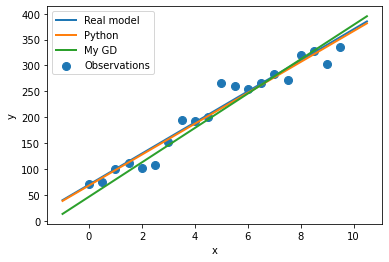

In [30]:
# Calculate data for the linear model using descent gradient
yesti=  b0esti + b1esti*xl

# Scatter plot of the data
plt.scatter(x, y, s=64, label='Observations' )
plt.plot(xl, yreal,     label='Real model',  linewidth=2)
plt.plot(xl, ypred,     label='Python',      linewidth=2)
plt.plot(xl, yesti,     label='My GD' ,      linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Plot loss vs epoch

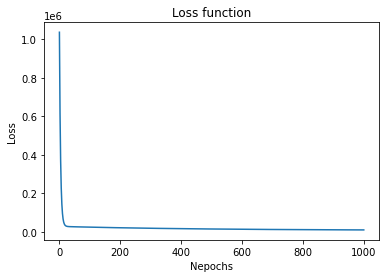

In [31]:
# Plot loss vs epoch
plt.plot(range(1, Nepochs+1, 1), LossPerEpoch)
plt.xlabel("Nepochs")
plt.ylabel("Loss")
plt.title('Loss function')
plt.show()


# Final remarks


- The **Gradient Descent** is an optimization algorithm used extensively in ML to learn the model parameters or weights from the training dataset 

- The method iteratively adapts (or updates) the parameters or weights of the model in order to minimize a cost function

- The hypothesis function

- The cost or loss function should be a smooth and continuous function

- The partial derivative of the cost function remain in terms of summations

- For a large number of observations the evaluation of the gradient will be inefficient


Limitations and solutions:

- The cost function $J(\beta)$ should be a smooth and continuous function

- For a classification problem, such as the Perceptron model:
    - The hypotheis function $f(\beta)$) is a step/sing function
    - The cost function $J(\beta)$ is defined as the squared error     
    - The problem is that $\frac{\partial J(\beta)}{\partial \beta}$ takes zero values at regions where there is not a minimum ¡¡
    - Therefore, such cost function cannot be used in the gradient descent scheme
    - There is a solution which yields to  the learning rule $ \mathbf{w} \Leftarrow  \mathbf{w} + \alpha \left( c_i - \hat{c}_i \right) \mathbf{x}_i $ for all $i=1,2,...,N$

Important concepts
- Stochastic gradiente descent (SGD)

- Epoch

- Batch

- Mini-batch


# Activity

1. Implement the gradient descent method for a multiple  $p$ parameters (vector operations)


In [13]:
import numpy  #numpy is used to make some operrations with arrays more easily


__errors__= [];  #global variable to store the errors/loss for visualisation

def h(params, sample):
	"""This evaluates a generic linear function h(x) with current parameters.  h stands for hypothesis

	Args:
		params (lst) a list containing the corresponding parameter for each element x of the sample
		sample (lst) a list containing the values of a sample 

	Returns:
		Evaluation of h(x)
	"""
	acum = 0
	for i in range(len(params)):
		acum = acum + params[i]*sample[i]  #evaluates h(x) = a+bx1+cx2+ ... nxn.. 
	return acum;


def show_errors(params, samples,y):
	"""Appends the errors/loss that are generated by the estimated values of h and the real value y
	
	Args:
		params (lst) a list containing the corresponding parameter for each element x of the sample
		samples (lst) a 2 dimensional list containing the input samples 
		y (lst) a list containing the corresponding real result for each sample
	
	"""
	global __errors__
	error_acum =0
#	print("transposed samples") 
#	print(samples)
	for i in range(len(samples)):
		hyp = h(params,samples[i])
		print( "hyp  %f  y %f " % (hyp,  y[i]))   
		error=hyp-y[i]
		error_acum=+error**2 # this error is the original cost function, (the one used to make updates in GD is the derivated verssion of this formula)
	mean_error_param=error_acum/len(samples)
	__errors__.append(mean_error_param)

def GD(params, samples, y, alfa):
	"""Gradient Descent algorithm 
	Args:
		params (lst) a list containing the corresponding parameter for each element x of the sample
		samples (lst) a 2 dimensional list containing the input samples 
		y (lst) a list containing the corresponding real result for each sample
		alfa(float) the learning rate
	Returns:
		temp(lst) a list with the new values for the parameters after 1 run of the sample set
	"""
	temp = list(params)
	general_error=0
	for j in range(len(params)):
		acum =0; error_acum=0
		for i in range(len(samples)):
			error = h(params,samples[i]) - y[i]
			acum = acum + error*samples[i][j]  #Sumatory part of the Gradient Descent formula for linear Regression.
		temp[j] = params[j] - alfa*(1/len(samples))*acum  #Subtraction of original parameter value with learning rate included.
	return temp

def scaling(samples):
	"""Normalizes sample values so that gradient descent can converge
	Args:
		params (lst) a list containing the corresponding parameter for each element x of the sample
	Returns:
		samples(lst) a list with the normalized version of the original samples
	"""
	acum =0
	samples = numpy.asarray(samples).T.tolist() 
	for i in range(1,len(samples)):	
		for j in range(len(samples[i])):
			acum=+ samples[i][j]
		avg = acum/(len(samples[i]))
		max_val = max(samples[i])
		#print("avg %f" % avg)
		#print(max_val)
		for j in range(len(samples[i])):
			#print(samples[i][j])
			samples[i][j] = (samples[i][j] - avg)/max_val  #Mean scaling
	return numpy.asarray(samples).T.tolist()




In [14]:
x

x1 = x.tolist()
x1

[[0.0],
 [0.5],
 [1.0],
 [1.5],
 [2.0],
 [2.5],
 [3.0],
 [3.5],
 [4.0],
 [4.5],
 [5.0],
 [5.5],
 [6.0],
 [6.5],
 [7.0],
 [7.5],
 [8.0],
 [8.5],
 [9.0],
 [9.5]]

In [15]:
#  univariate example
#params = [0,0]
#samples = [1,2,3,4,5]
#y = [2,4,6,8,10]

params   = [0,0]
samples  = x.tolist()
#y        = [2,4,6,8,10]

#  multivariate example trivial
#params = [0,0,0]
#samples = [[1,1],[2,2],[3,3],[4,4],[5,5]]
#y = [2,4,6,8,10]

#  multivariate example
#params = [0,0,0]
#samples = [[1,1],[2,2],[3,3],[4,4],[5,5],[2,2],[3,3],[4,4]]
#y = [2,4,6,8,10,2,5.5,16]


alfa =.01  #  learning rate
for i in range(len(samples)):
    if isinstance(samples[i], list):
        samples[i]=  [1]+samples[i]
    else:
        samples[i]=  [1,samples[i]]

print ("original samples:")
print (samples)
samples = scaling(samples)
print ("scaled samples:")
print (samples)



original samples:
[[1, 0.0], [1, 0.5], [1, 1.0], [1, 1.5], [1, 2.0], [1, 2.5], [1, 3.0], [1, 3.5], [1, 4.0], [1, 4.5], [1, 5.0], [1, 5.5], [1, 6.0], [1, 6.5], [1, 7.0], [1, 7.5], [1, 8.0], [1, 8.5], [1, 9.0], [1, 9.5]]
scaled samples:
[[1.0, -0.049999999999999996], [1.0, 0.0026315789473684236], [1.0, 0.05526315789473685], [1.0, 0.10789473684210525], [1.0, 0.16052631578947368], [1.0, 0.2131578947368421], [1.0, 0.2657894736842105], [1.0, 0.31842105263157894], [1.0, 0.37105263157894736], [1.0, 0.42368421052631583], [1.0, 0.47631578947368425], [1.0, 0.5289473684210527], [1.0, 0.5815789473684211], [1.0, 0.6342105263157896], [1.0, 0.6868421052631579], [1.0, 0.7394736842105264], [1.0, 0.7921052631578948], [1.0, 0.8447368421052632], [1.0, 0.8973684210526316], [1.0, 0.9500000000000001]]


[0, 0]
hyp  2.084885  y 34.540591 
hyp  2.150639  y 97.447909 
hyp  2.216394  y 97.312653 
hyp  2.282149  y 123.377358 
hyp  2.347903  y 101.193001 
hyp  2.413658  y 158.610516 
hyp  2.479413  y 164.859931 
hyp  2.545167  y 160.154567 
hyp  2.610922  y 194.521733 
hyp  2.676677  y 207.542377 
hyp  2.742431  y 247.719005 
hyp  2.808186  y 226.642822 
hyp  2.873940  y 274.112862 
hyp  2.939695  y 252.373612 
hyp  3.005450  y 259.425675 
hyp  3.071204  y 298.042976 
hyp  3.136959  y 329.068734 
hyp  3.202714  y 328.028899 
hyp  3.268468  y 379.013192 
hyp  3.334223  y 360.714998 
[array([2.14735171]), array([1.24933812])]
[array([2.14735171]), array([1.24933812])]
hyp  4.143341  y 34.540591 
hyp  4.274148  y 97.447909 
hyp  4.404955  y 97.312653 
hyp  4.535762  y 123.377358 
hyp  4.666569  y 101.193001 
hyp  4.797376  y 158.610516 
hyp  4.928183  y 164.859931 
hyp  5.058990  y 160.154567 
hyp  5.189797  y 194.521733 
hyp  5.320604  y 207.542377 
hyp  5.451411  y 247.719005 
hyp  5.582218 

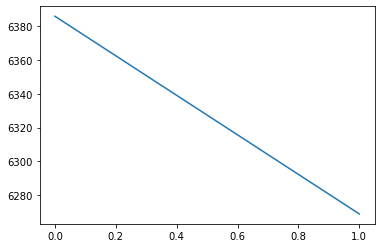

In [16]:
epochs = 0

while True:  #  run gradient descent until local minima is reached
    oldparams = list(params)
    print (params)
    params=GD(params, samples,y,alfa)	
    show_errors(params, samples, y)  #only used to show errors, it is not used in calculation
    print (params)
    epochs = epochs + 1
    if(oldparams == params or epochs == 2):   #  local minima is found when there is no further improvement
        print ("samples:")
        print(samples)
        print ("final params:")
        print (params)
        break

import matplotlib.pyplot as plt  #use this to generate a graph of the errors/loss so we can see whats going on (diagnostics)
plt.plot(__errors__)
plt.show()